In [1]:
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors
import shutil
from ffprobe import FFProbe

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 
from time import sleep
from IPython.display import clear_output

%load_ext autoreload
%autoreload 2

In [2]:
!ls /Users/artemmerinov/data/holoassist/HoloAssist

R0027-12-GoPro                     z024-june-21-22-gladom_disassemble
R029-12July-DSLR                   z090-july-08-22-printer_small
R034-12July-Switch                 z183-sep-08-22-marius_disassemble
R061-15July-Belt                   z206-sep-26-22-gopro
R100-1Aug-Coffee                   z208-sep-27-22-nespresso
R128-25Aug-RAM                     z209-sep-28-22-gladom_disassemble
R189-24Oct-ATV


In [3]:
holoassist_dir = "/Users/artemmerinov/data/holoassist/HoloAssist"
video_name = "z208-sep-27-22-nespresso"
base_path = os.path.join(holoassist_dir, video_name, "Export_py")
img_path = os.path.join(base_path, 'Video')
mpeg_img_path = os.path.join(base_path, "Video", "images")
print(base_path)
print(img_path)

/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py
/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py/Video


In [4]:
mpeg_img_path

'/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py/Video/images'

In [5]:
!ls /Users/artemmerinov/data/holoassist/HoloAssist/z090-july-08-22-printer_small/Export_py/Video

Pose_sync.txt      VideoMp4Timing.txt images


In [6]:
start_time_path = os.path.join(img_path, 'VideoMp4Timing.txt')
with open(start_time_path) as f:
    lines = f.read().split('\n')
    start_time = int(lines[0])
    end_time = int(lines[1])

start_time, end_time

(637986360007930075, 637986361643990075)

In [7]:
(637928038138138094 - 637928035471258094) / 10**7

266.688

In [8]:
896/504, 16/9, (16*34, 9*34), (16*40, 9*40)

(1.7777777777777777, 1.7777777777777777, (544, 306), (640, 360))

In [9]:
mpeg_img_path

'/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py/Video/images'

In [10]:
# os.chdir(os.path.join(base_path, "Video"))
# if not os.path.exists(mpeg_img_path):
#     # Export images if the path does not exist.
#     os.mkdir(mpeg_img_path)
#     # os.system("ffmpeg -i ../Video_pitchshift.mp4 -start_number 0 images/%06d.png")
#     command = (
#         "ffmpeg -i ../Video_pitchshift.mp4 "
#         "-vf 'fps=10,scale=640:350' "
#         "-start_number 0 "
#         "images/%06d.png"
#     )
#     os.system(command)

In [11]:
3 * 6300 # ~ 20 Tb

18900

In [12]:
0.5 * 6300 # ~3Tb

3150.0

# Extract frames

In [13]:
import os
os.chdir('../')

from process_data.extract_frames import extract_frames, extract_frames_all

In [14]:
# extract_frames(holoassist_dir="/data/users/amerinov/data/holoassist/HoloAssist", video_name="z208-sep-27-22-nespresso", fps=1, width=640, height=350)
extract_frames(
    holoassist_dir="/Users/artemmerinov/data/holoassist/HoloAssist",
    video_name="z208-sep-27-22-nespresso", 
    fps=1, 
    width=640, 
    height=350
)

In [15]:
# extract_frames_all(holoassist_dir=holoassist_dir)

# Load frames

In [18]:
def load_frames(
        holoassist_dir: str,
        video_name: str, 
        start_secs: float,
        end_secs: float,
        fps: int
    ):
    """
    Load images from directory and filter them 
    based on the time interval.
    """
    path_to_frames = os.path.join(holoassist_dir, video_name, "Export_py", "Video", "images")
    frames = sorted(os.listdir(path_to_frames))

    # Convert seconds to frames
    start_frame = int(start_secs * fps)
    end_frame = int(end_secs * fps)

    # Load only images within the specified frame range
    filt_frames = frames[start_frame:end_frame]
    filt_paths = [f"{path_to_frames}/{f}" for f in filt_frames]

    return filt_paths

paths = load_frames(
    holoassist_dir=holoassist_dir,
    video_name="z208-sep-27-22-nespresso",
    start_secs=12,
    end_secs=15,
    fps=1,
)
paths

['/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py/Video/images/000012.png',
 '/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py/Video/images/000013.png',
 '/Users/artemmerinov/data/holoassist/HoloAssist/z208-sep-27-22-nespresso/Export_py/Video/images/000014.png']

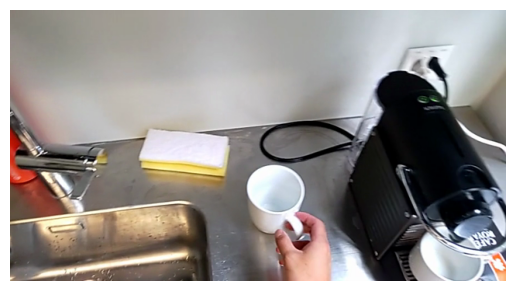

In [19]:
def animate(frames):

    plt.figure()
    for i in range(len(frames)):
        plt.imshow(frames[i])
        plt.axis('off')  
        plt.show()
        sleep(0.1)
        clear_output(wait=True)


frames = []
for path in paths:
    frame = Image.open(path)
    frames.append(frame)

animate(frames)